In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [51]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

labels, data = np.array(train['labels'], dtype=np.float64) , np.array(train['data'], dtype=np.float64) # Сonversion to float!

In [3]:
# Show i'th image
def show_image(img):
    plt.imshow(img.reshape(28,28))

In [52]:
# Normalizing and classification -1/+1
def pixel_norm(x):
    for i,pixel in enumerate(x):
        x[i] = pixel/255
    return x

def classification(y):
    for i,label in enumerate(y):
        y[i]=-1 if label==5 else 1
    return y

data = pixel_norm(data)
labels = classification(labels)

# Создание модели

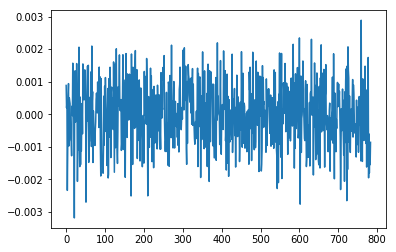

In [5]:
# Creating two perceptrons in output layer
'''Global weight declaration for multiple Runs capabilities'''

np.random.seed(20)
w = np.array(data.shape[1])
w = np.random.normal(scale=0.001, size = data.shape[1])
plt.plot(w)

In [64]:
# k-fold Cross Validation Scheme with shuffling
'''k-fold must be 'None' or 2,3..'''

k_fold = 3

def cross_validation(data, labels):
    global x_train, y_train
    data_set = np.insert(data, 0, labels, axis=1) # Insert labels(y) in each image(x) row
    random.shuffle(data_set)
    if k_fold != None:
        global x_valid, y_valid 
        train = np.asarray([x for i, x in enumerate(data_set) if i % k_fold != 1])
        valid = np.asarray([x for i, x in enumerate(data_set) if i % k_fold == 1])
        y_train, x_train = train[:, 0], train[:, np.r_[1:train.shape[1]]] 
        y_valid, x_valid = valid[:, 0], valid[:, np.r_[1:train.shape[1]]]
        print("Training images:", x_train.shape[0])
        print("Validation images:", x_valid.shape[0])
    else:
        train = np.asarray(data_set)
        y_train, x_train = train[:, 0], train[:, np.r_[1:train.shape[1]]]
        print("Validation images:", x_train.shape[0])

cross_validation(data, labels)

loss_train = []
loss_valid = []
acc_train = []
acc_valid = []

Training images: 6667
Validation images: 3333


# Обучаем модель

In [28]:
# Stochastic gradient descent
reg_param = 0.01
def sgd(x, y, weight):
    return (-1)*y*x/(1 + np.exp(y*np.dot(weight.T, x))) + reg_param*weight

In [8]:
# Logloss calculation
def lgs(x, y, weight):
    return np.log(1 + np.exp(-y*np.dot(weight.T, x)))

In [9]:
# Learning steps
learn_rate = 0.001
def lrn_step(x, y, weight):
    return learn_rate*sgd(x, y, weight)
    

In [10]:
def accuracy(x, y, weight, treshold):
    n_all = x.shape[0]
    n_true = 0
    for row in x:
        activation = 1/(1+np.exp(-y*np.dot(weight.T, row)))
        if activation > treshold:
            n_true += 1
    return n_true/n_all

In [11]:
# Learning epoch
mini_batch_size = 100
def epoch():
    global w
    batch_loss = 0
    loss = []
    for it in tqdm.tqdm_notebook(range(y_train.shape[0])):
        
        j = np.random.randint(0, y_train.shape[0])    
        
        w -= lrn_step(x_train[j], y_train[j], w)
        
        batch_loss += lgs(x_train[j], y_train[j], w) 
        
        if ((it+1) % mini_batch_size == 0):
            loss = np.append(loss, (batch_loss/mini_batch_size))
            batch_loss = 0
            #acc = np.append(acc, accuracy(x, y[j], w, 0.4)) 
    return loss

In [65]:
loss_train = epoch()

TypeError: 'numpy.ndarray' object is not callable

Training Loss:  0.07226780487082851


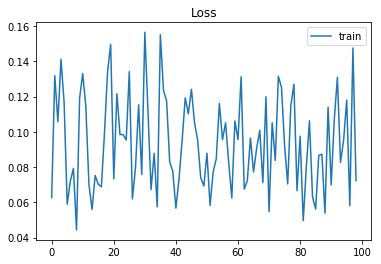

In [60]:
plt.title('Loss')
plt.plot(loss_train, label='train')
#plt.plot(loss_valid, label='test')
plt.legend()

print("Training Loss: ", loss_train[-1])

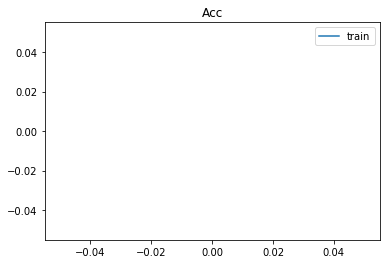

In [56]:
plt.title('Acc')
plt.plot(acc_train, label='train')
#plt.plot(acc_valid, label='test')
plt.legend()

Вероятность того, что это 5 -  0.9954645603672397 ;
Вероятность того, что это 6 -  0.004535439632760282


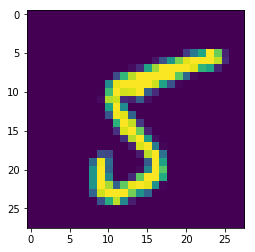

In [61]:
def predict(x): 
    return float(1. / (1. + np.exp(-np.dot(w, x))))

p_train = np.zeros((x_train.shape[0]))
p_valid = np.zeros((x_valid.shape[0]))

num = 0
for i in range(x_valid.shape[0]):
    p_valid[i] = predict(x_valid[i])
    if (p_valid[i] > 0.5):
        num += 1
accur = num/x_valid.shape[0]

k = 0
#print(accur)
print("Вероятность того, что это 5 - ", 1 - p_valid[k], ";\nВероятность того, что это 6 - ", p_valid[k])
show_image(x_valid[k])


In [63]:
def logloss(true_label, predicted_prob):
    if true_label == 1:
        return -math.log(predicted_prob)
    else:
        return -math.log(1 - predicted_prob)
    
for i in range(x_valid.shape[0]):
    lgs = np.append(lgs, (logloss(y_valid[i], p_valid[i])))
    
print(lgs[-1])

0.09929255744099025


# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

NameError: name 'logloss_array' is not defined

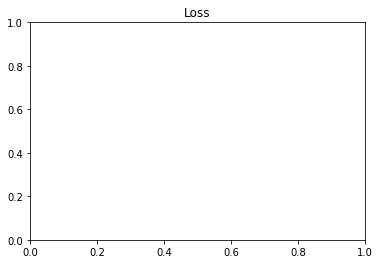

In [17]:
plt.title('Loss')
plt.plot(logloss_array[0], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

In [ ]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval], label='train')
plt.plot([e[1] for e in te_eval], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [ ]:
X = test_no_lables['data']

# compute Y_pred
Y_pred = np.zeros(X.shape[0], dtype=float)
for i in range(X.shape[0]):
    Y_pred[i] = predict(X[i])

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

k = 623
show_image(X[k])
print(Y_pred[k])

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb